### Analysis of US Air-flight

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
flt_data = pd.read_csv(r'C:\Users\pc\Desktop\mydataanalysis\python\jupyterNotebook\flights.csv')
flt_data.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


### Working with null values and outliers

In [61]:
flt_data.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [62]:
flt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [63]:
flt_data['DepDelay'].isnull().sum()
# means no flight was delayed up to 15 for DepDel15 that are null

0

In [64]:
flt_data['DepDel15'] = flt_data['DepDel15'].fillna(0)
flt_data.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

Min: -75
Mode: 0
Mean: 6.496649996322718
Median: -3.0
Max: 1440


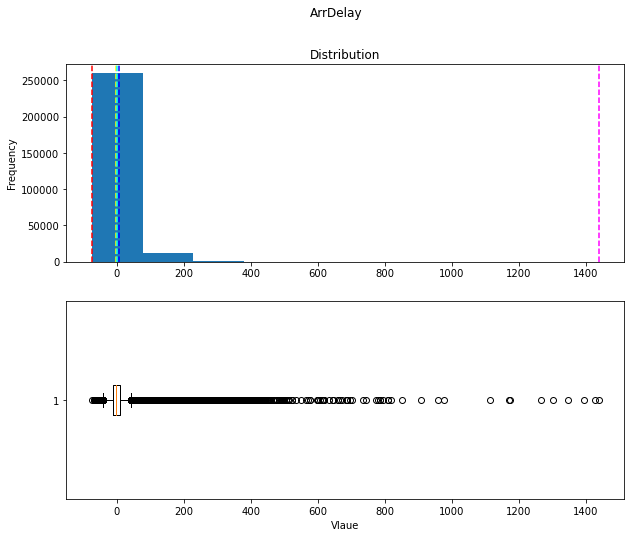

Min: -63
Mode: -3
Mean: 10.350448628373906
Median: -1.0
Max: 1425


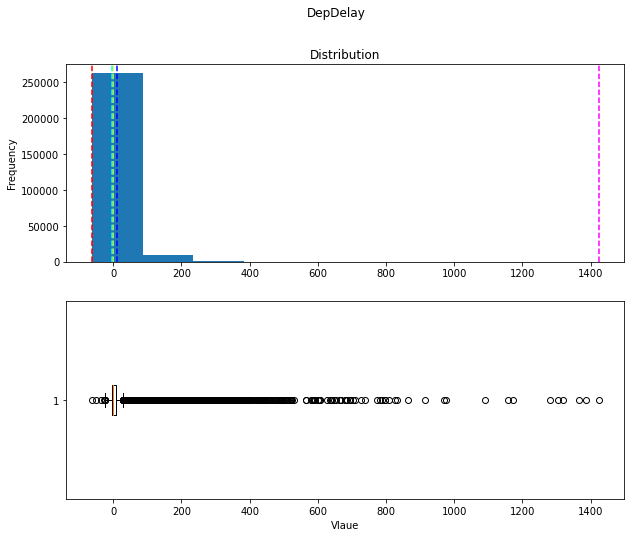

In [65]:
# Outliers
def show_distribution(vardata):
    minvar = vardata.min()
    meanvar = vardata.mean()
    medianvar = vardata.median()
    modevar = vardata.mode()[0]
    maxvar = vardata.max()
    print('Min: {}\nMode: {}\nMean: {}\nMedian: {}\nMax: {}'.format(minvar,modevar,meanvar,medianvar,maxvar))
    
    fig, ax = plt.subplots(2,1, figsize=(10,8))
    ax[0].hist(vardata)
    ax[0].set_title('Distribution')
    ax[0].set_ylabel('Frequency')
    ax[0].axvline(x=minvar, color='red', linestyle='dashed')
    ax[0].axvline(x=meanvar, color='blue', linestyle='dashed')
    ax[0].axvline(x=medianvar, color='yellow', linestyle='dashed')
    ax[0].axvline(x=modevar, color='cyan', linestyle='dashed')
    ax[0].axvline(x=maxvar, color='magenta', linestyle='dashed')
    
    ax[1].boxplot(vardata, vert=False)
    ax[1].set_xlabel('Vlaue')
    fig.suptitle(vardata.name)
    plt.show()
    
cols = ['ArrDelay','DepDelay']
for col in cols:
    show_distribution(flt_data[col])

Min: -32
Mode: 0
Mean: -5.030275610199769
Median: -6.0
Max: 37


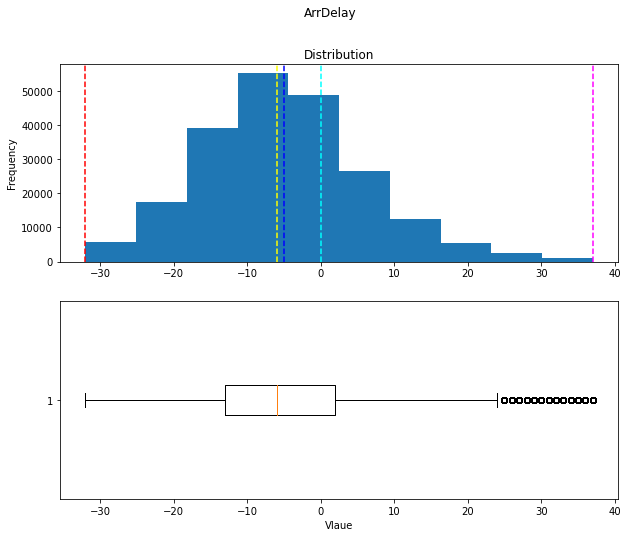

Min: -11
Mode: -3
Mean: -0.9216920012873314
Median: -2.0
Max: 16


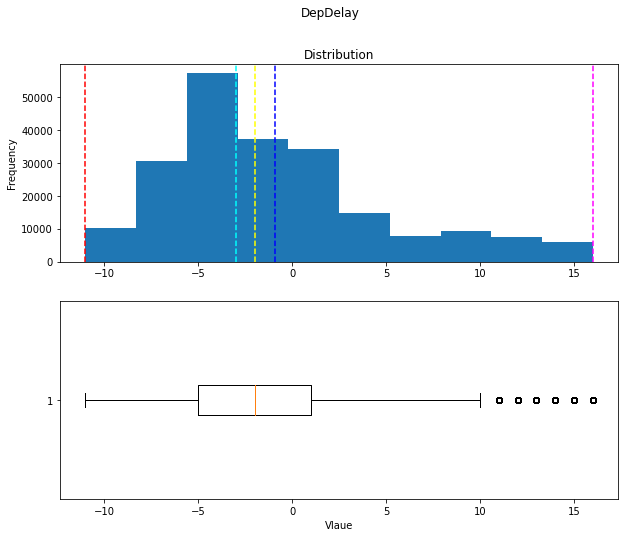

In [66]:
# using quantile percentage to remove outliers
ArrDelay_quantile = flt_data.ArrDelay.quantile(0.01)
ArrDelay_quantiles = flt_data.ArrDelay.quantile(0.90)
flt_data =  flt_data[flt_data.ArrDelay < ArrDelay_quantiles]
flt_data =  flt_data[flt_data.ArrDelay > ArrDelay_quantile]

DepDelay_quantile = flt_data.DepDelay.quantile(0.01)
DepDelay_quantiles = flt_data.DepDelay.quantile(0.90)
flt_data =  flt_data[flt_data.DepDelay < DepDelay_quantiles]
flt_data =  flt_data[flt_data.DepDelay > DepDelay_quantile]
for col in cols:
    show_distribution(flt_data[col])

In [67]:
flt_data.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,0.018116,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,0.133371,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,0.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


Min: -32
Mode: 0
Mean: -5.030275610199769
Median: -6.0
Max: 37


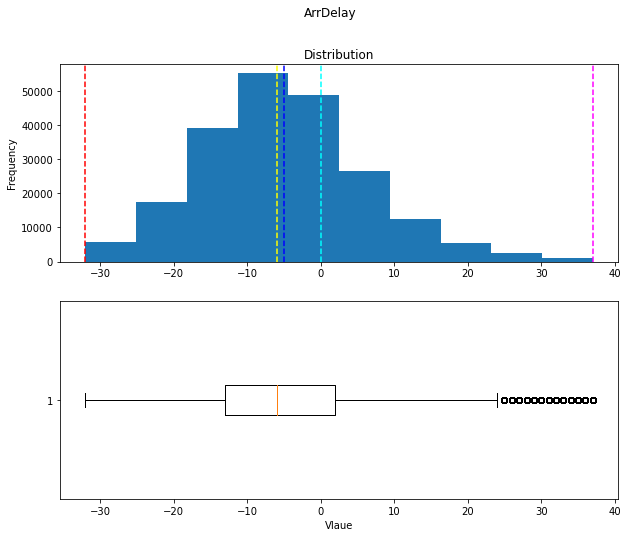

Min: -11
Mode: -3
Mean: -0.9216920012873314
Median: -2.0
Max: 16


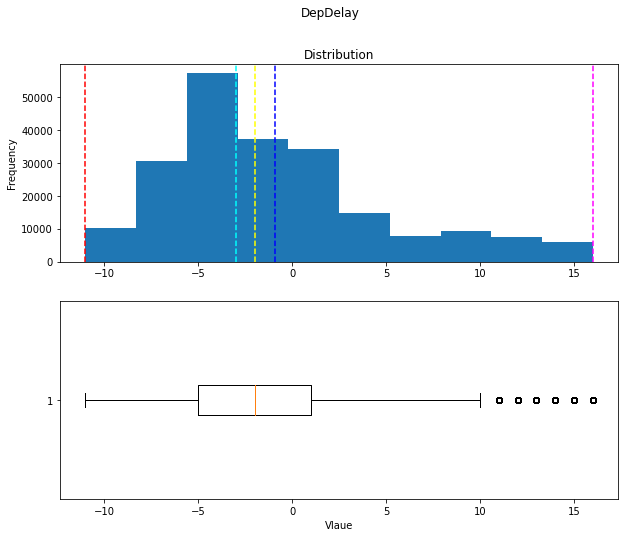

In [68]:
for col in cols:
    show_distribution(flt_data[col])

### What are the Average departure and arrival delays?

In [69]:
print(f'Average Depature and Arrival Delay:')
flt_data[['DepDelay', 'ArrDelay']].mean()

Average Depature and Arrival Delay:


DepDelay   -0.921692
ArrDelay   -5.030276
dtype: float64

### How do the carriers compare in terms of arrival delay performance?

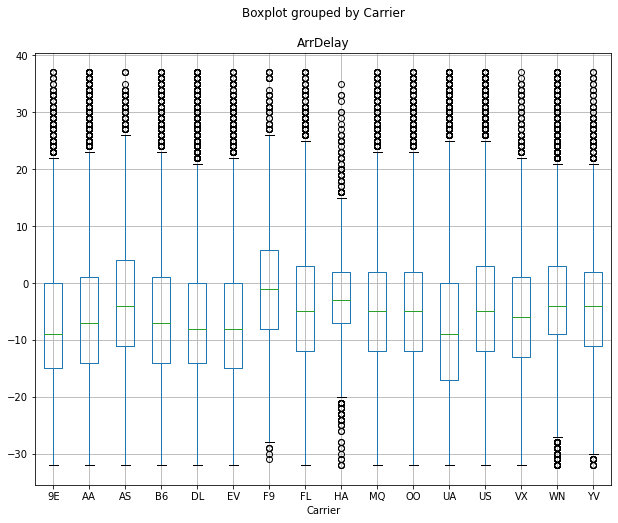

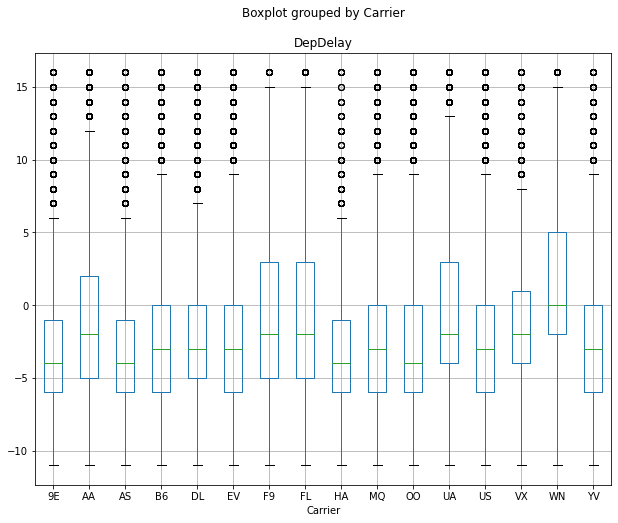

In [70]:
for col in cols:
    flt_data.boxplot(column=col, by='Carrier', figsize=(10,8))
plt.show()

### Are some days of the week more prone to arrival delays than others?

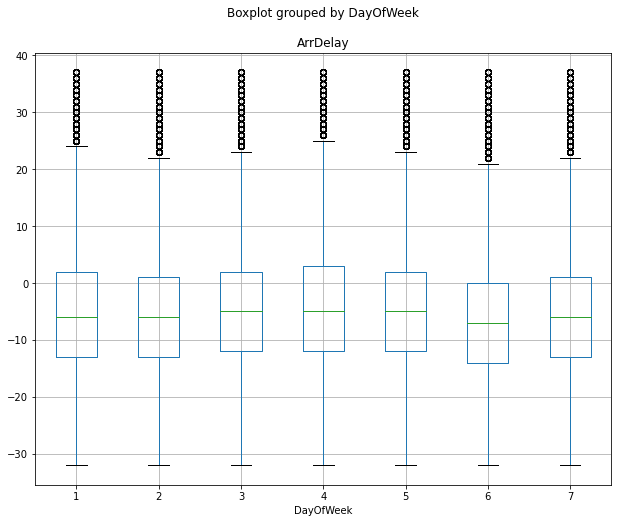

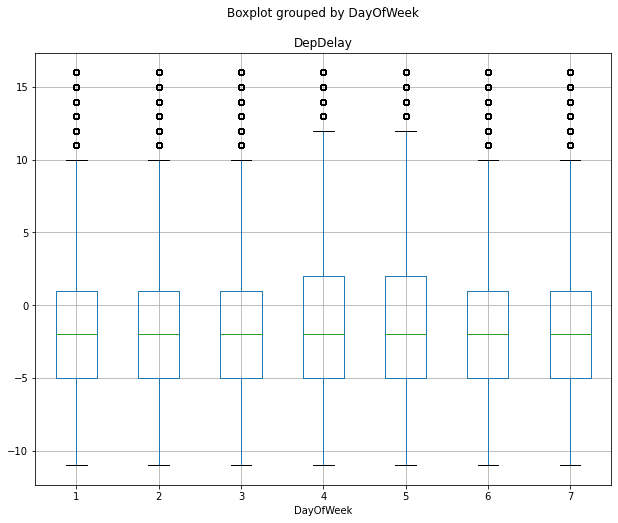

In [71]:
for col in cols:
    flt_data.boxplot(column=col, by='DayOfWeek', figsize=(10,8))
plt.show()

### Which departure airport has the highest average departure delay?

,DepDelay
OriginAirportName,
Chicago Midway International,2.365960
Dallas Love Field,2.148798
William P Hobby,1.561927
Metropolitan Oakland International,0.964853
Denver International,0.807272
...,...
Memphis International,-2.962737
Tucson International,-2.989154
Ted Stevens Anchorage International,-3.149758


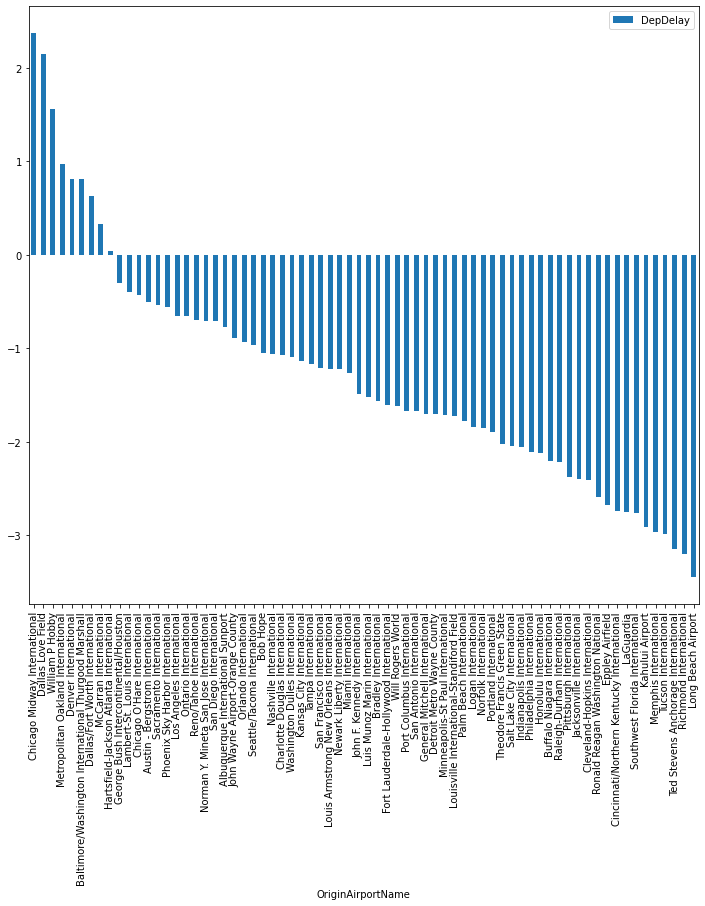

In [72]:
depature_group = flt_data.groupby('OriginAirportName')
mean_org = pd.DataFrame(depature_group['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
mean_org.plot(kind='bar', figsize=(12,11))
mean_org

### Do late departures tend to result in longer arrival delays than on-time departures?

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

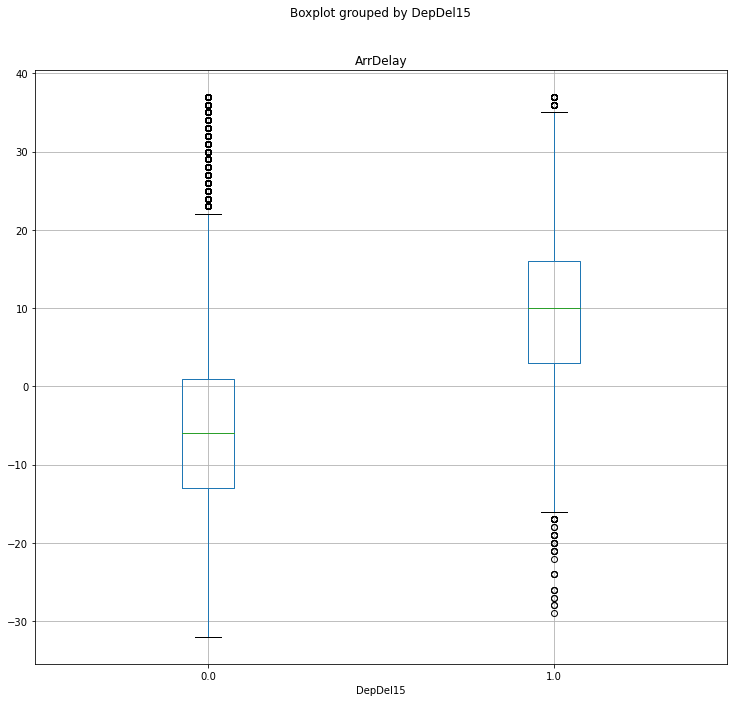

In [73]:
flt_data.boxplot(column='ArrDelay', by='DepDel15', figsize=(12,11))

### Which route (from origin airport to destination airport) has the most late arrivals?

In [75]:
routes = pd.Series(flt_data['OriginAirportName'] + '>' + flt_data['DestAirportName'])
flt_data = pd.concat([flt_data, routes.rename("Route")], axis=1)

most_group = flt_data.groupby(flt_data.Route)
pd.DataFrame(most_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
San Francisco International>Los Angeles International,90
Los Angeles International>San Francisco International,69
LaGuardia>Hartsfield-Jackson Atlanta International,68
Los Angeles International>John F. Kennedy International,52
LaGuardia>Charlotte Douglas International,51
...,...
Logan International>Austin - Bergstrom International,0
Logan International>Memphis International,0
Logan International>Port Columbus International,0


### Which route has the highest average arrival delay?

In [78]:
# most_group = flt_data.groupby(flt_data.Route)
pd.DataFrame(most_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Route,
Louis Armstrong New Orleans International>Ronald Reagan Washington National,24.500000
Cleveland-Hopkins International>Palm Beach International,18.000000
John F. Kennedy International>Louisville International-Standiford Field,18.000000
Cleveland-Hopkins International>Philadelphia International,12.800000
Memphis International>Denver International,9.758621
...,...
Lambert-St. Louis International>Cleveland-Hopkins International,-20.000000
Eppley Airfield>LaGuardia,-20.750000
Denver International>Kahului Airport,-22.666667
